# Evaluating Logistic Regression Models - Lab

## Introduction

As we saw with KNN, we need alternative evaluation metrics to determine the effectiveness of classification algorithms. In regression, we were predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall and accuracy in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for precision, the number of cancer positive cases, then it is to optimize recall, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [2]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Your code here
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df.target

for col in X:
    X[col] = (X[col] - min(X[col]))/(max(X[col] - min(X[col])))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## 2. Create a standard logistic regression model

In [10]:
#Your code here
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression().fit(X_train, y_train)

y_hat_train = logic.predict(X_train)
y_hat_test = logic.predict(X_test)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 3. Write a function to calculate the precision

In [11]:
def precision(y_hat, y):
    return metrics.precision_score(y, y_hat)
    #Your code here

## 4. Write a function to calculate the recall

In [12]:
def recall(y_hat, y):
    return metrics.recall_score(y, y_hat)
    #Your code here

## 5. Write a function to calculate the accuracy

In [13]:
def accuracy(y_hat, y):
    return metrics.accuracy_score(y, y_hat)
    #Your code here

## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [26]:
#Your code here
def model_stats(y_hat_train, y_hat_test, y_train, y_test):
    acc_test = accuracy(y_hat_train, y_train)
    prec_test = precision(y_hat_train, y_train)
    rec_test = recall(y_hat_train, y_train)
    acc_train = accuracy(y_hat_test, y_test)
    prec_train = precision(y_hat_test, y_test)
    rec_train = recall(y_hat_test, y_test)
    test_stats = dict( accuracy = acc_test, precision = prec_test, recall = rec_test)
    train_stats = dict( accuracy = acc_train, precision = prec_train, recall = rec_train)

    return [train_stats, test_stats]

model_stats(y_hat_train, y_hat_test, y_train, y_test)

[{'accuracy': 0.6807017543859649,
  'precision': 0.726027397260274,
  'recall': 0.6751592356687898},
 {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}]

## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [20]:
import matplotlib.pyplot  as plt
%matplotlib inline

In [30]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)
    training_Precision.append(model_stats(y_hat_train, y_hat_test, y_train, y_test)[0]['precision'])
    training_Recall.append(model_stats(y_hat_train, y_hat_test, y_train, y_test)[0]['recall'])
    training_Accuracy.append(model_stats(y_hat_train, y_hat_test, y_train, y_test)[0]['accuracy'])
    testing_Precision.append(model_stats(y_hat_train, y_hat_test, y_train, y_test)[1]['precision'])
    testing_Recall.append(model_stats(y_hat_train, y_hat_test, y_train, y_test)[1]['recall'])
    testing_Accuracy.append(model_stats(y_hat_train, y_hat_test, y_train, y_test)[1]['accuracy'])
# 6 lines of code here


/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

Text(0.5,0,'testing')

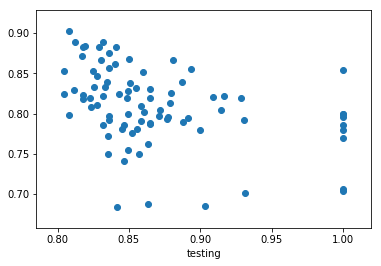

In [34]:
# code for test and train precision
plt.scatter(testing_Precision, training_Precision)
plt.xlabel("testing")

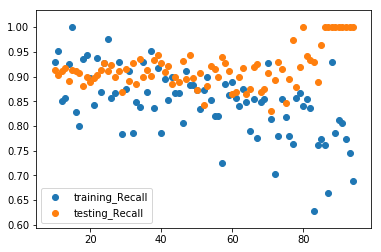

In [38]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall')
plt.legend()

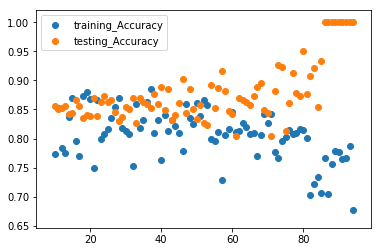

In [37]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.